In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

### Training a MNIST Model

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


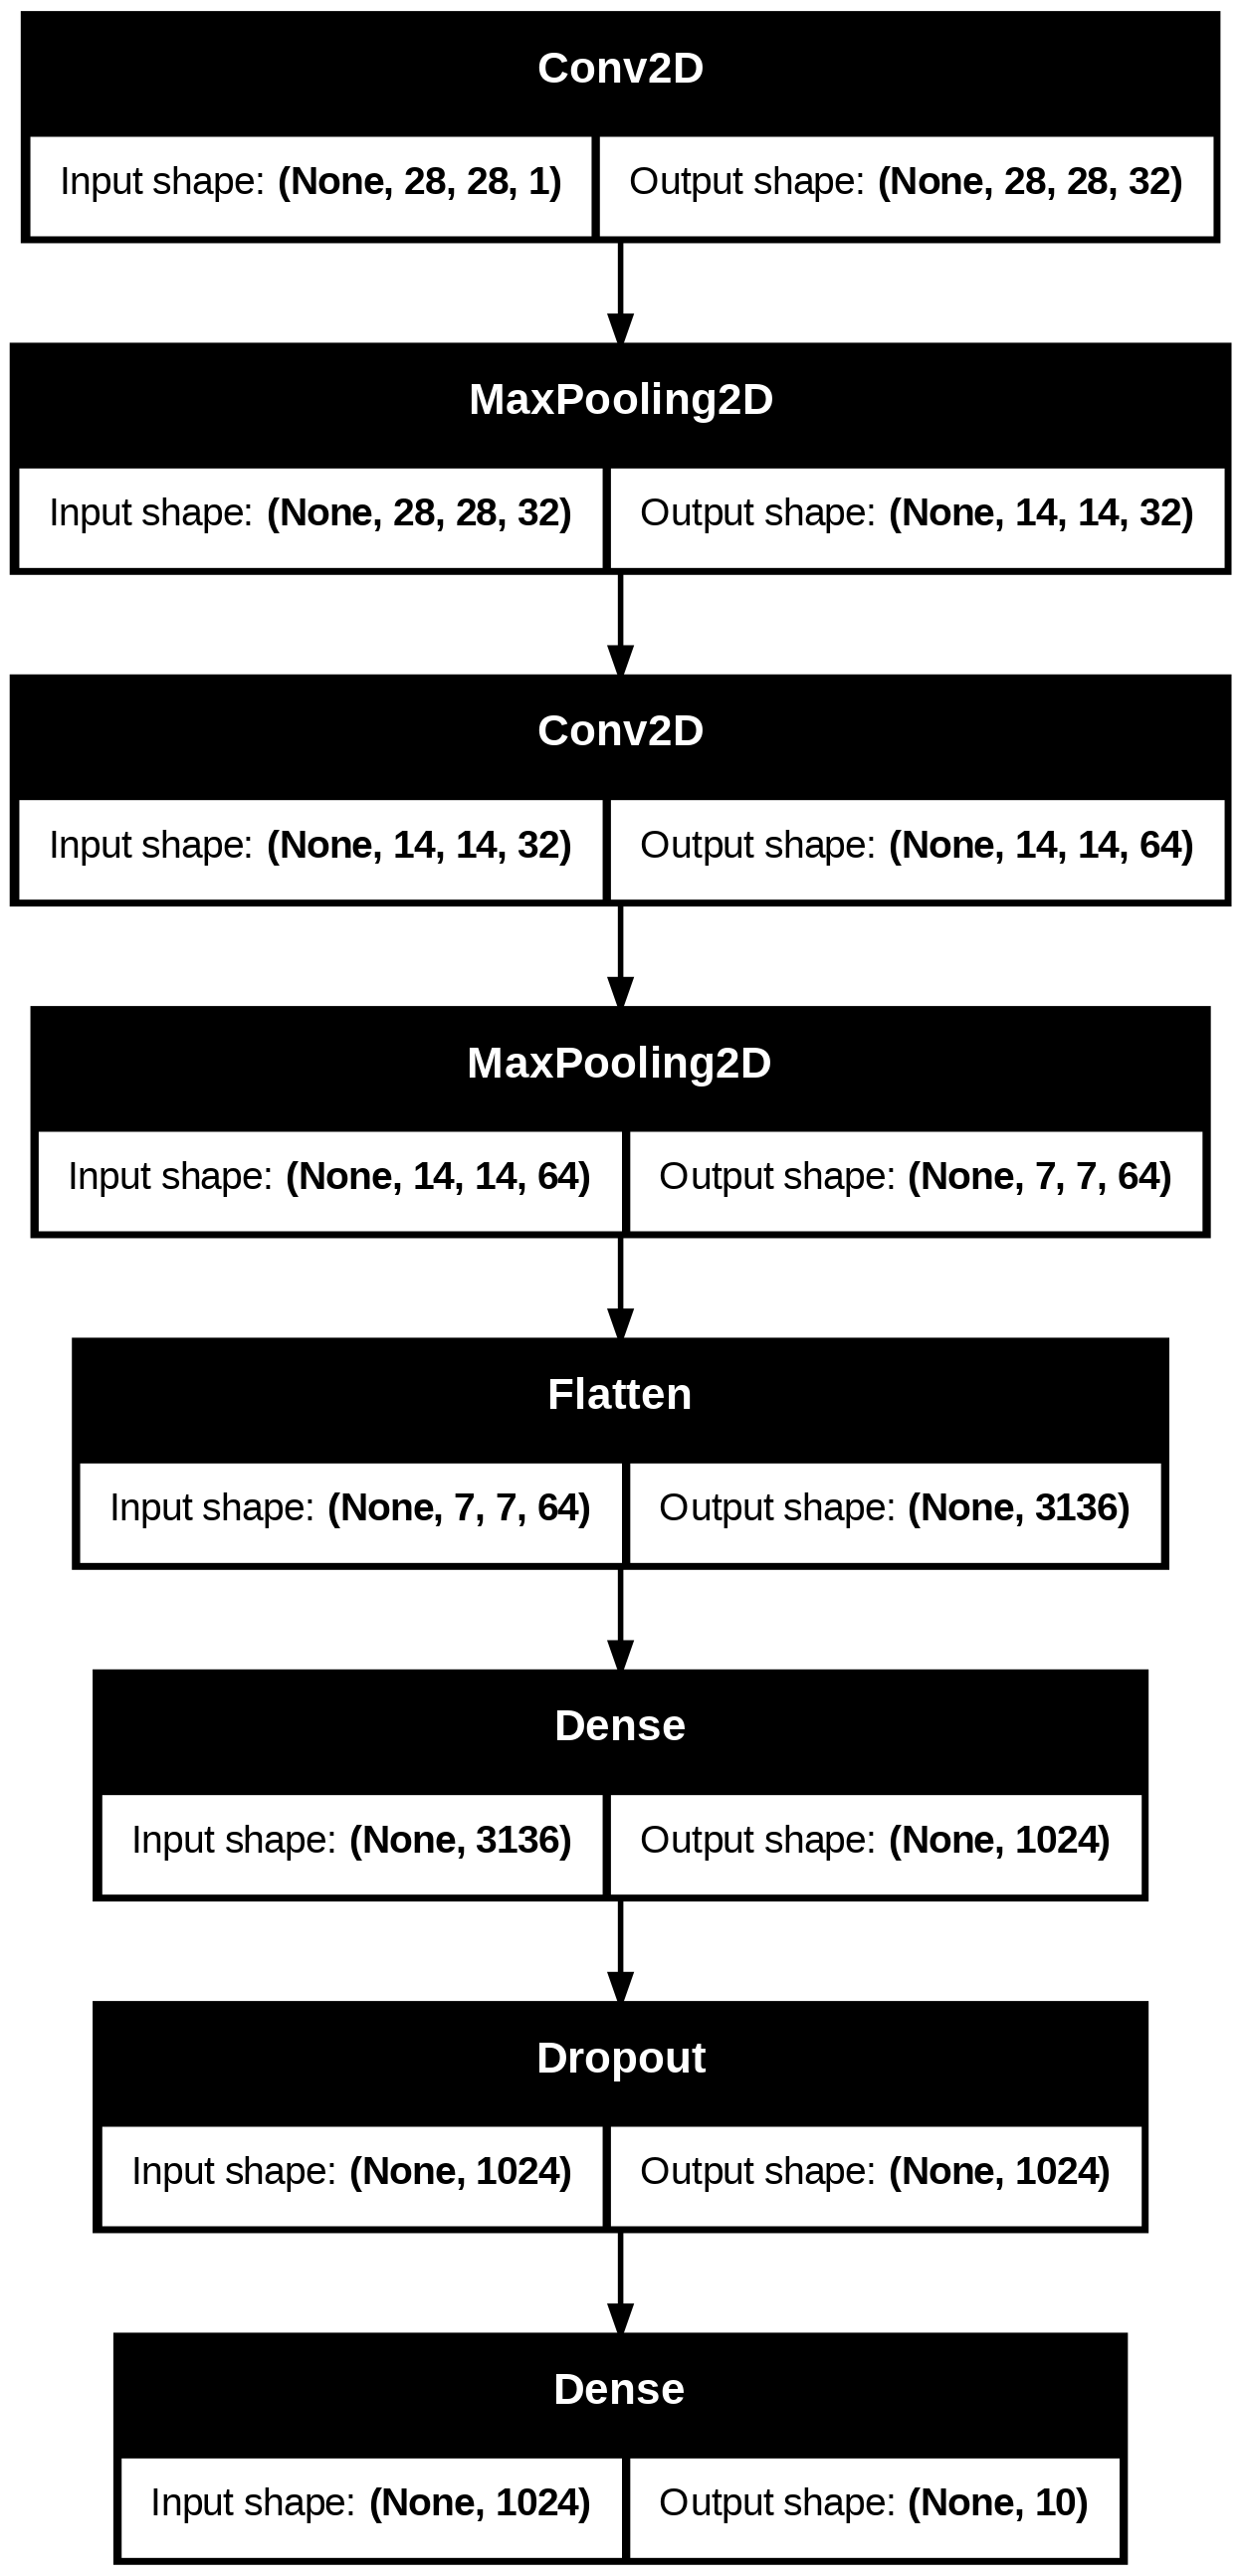

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
Early_stop = EarlyStopping(monitor='val_loss',restore_best_weights=True,patience = 5)

In [9]:
history = model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9005 - loss: 0.3070 - val_accuracy: 0.9890 - val_loss: 0.0330
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9879 - val_loss: 0.0329
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9921 - loss: 0.0234 - val_accuracy: 0.9916 - val_loss: 0.0256
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9904 - val_loss: 0.0304
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9950 - loss: 0.0139 - val_accuracy: 0.9909 - val_loss: 0.0279


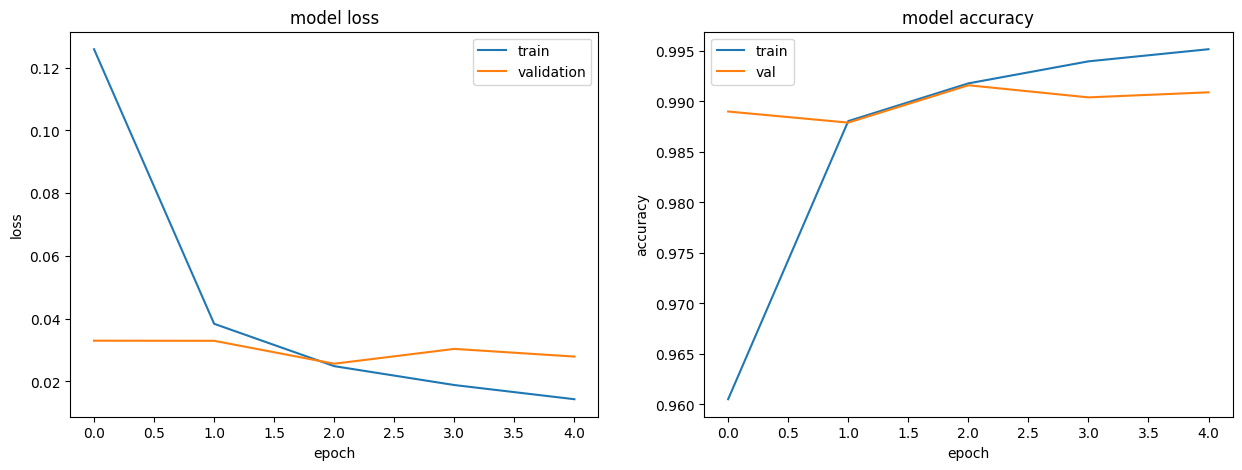

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [11]:
def preprocess_and_extract_digits(image):

    image = cv2.resize(image, (224, 224)) # Resize image to standard size.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) # Apply Gaussian blur to reduce noise
    edges = cv2.Canny(gray, threshold1=100, threshold2=200) # Edge Detection Using Canny

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sorting contours based on their position (left to right, top to bottom)
    contours = sorted(contours, key=lambda cnt: cv2.boundingRect(cnt)[0])

    # Putting Extracted Digits in a list.
    digits = []

    for contour in contours:
        # Storing the bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Only consider bounding boxes that are of a reasonable size to represent digits
        if w > 5 and h > 15:

            digit_image = gray[y:y + h, x:x + w]

            # Resizing the digit image to 28x28 pixels (standard for MNIST)
            digit_image_resized = cv2.resize(digit_image, (28, 28))

            # Normalizing (scale to range [0, 1])
            digit_image_normalized = digit_image_resized.astype(np.float32) / 255.0

            # Add channel dimension
            digit_image_reshaped = np.expand_dims(digit_image_normalized, axis=-1)

            # Appending to the list
            digits.append(digit_image_reshaped)

    # return np array
    return np.array(digits)


In [12]:
import math
def plot_detected_digits(image):

    digits = preprocess_and_extract_digits(image)

    num_digits = len(digits)
    cols = 5  # Number of columns for plotting
    rows = (num_digits // cols) + math.ceil((num_digits % cols)/5)

    # Create the plot
    plt.figure(figsize=(cols * 2, rows * 2))

    for i, digit in enumerate(digits):
        plt.subplot(rows, cols, i + 1)  # Set position in the grid
        plt.imshow(digit.squeeze(), cmap='gray')  # Squeeze to remove channel dimension
        plt.axis('off') # Hide axis

    # Show the plot
    plt.tight_layout()
    plt.show()

In [13]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mnist1.jpeg')
image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mnist2.jpeg')
image3=cv2.imread('/content/drive/MyDrive/Colab Notebooks/image3.png')
image4=cv2.imread('/content/drive/MyDrive/Colab Notebooks/mnist4.png')
image5=cv2.imread('/content/drive/MyDrive/Colab Notebooks/mnist5.png')
image6=cv2.imread('/content/drive/MyDrive/Colab Notebooks/mnist6.png')
image7=cv2.imread('/content/drive/MyDrive/Colab Notebooks/mnist7.png')


array([[[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       ...,

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [240, 240, 240],
        [240, 240, 240],
        [240, 240, 240]]], dtype=uint8)
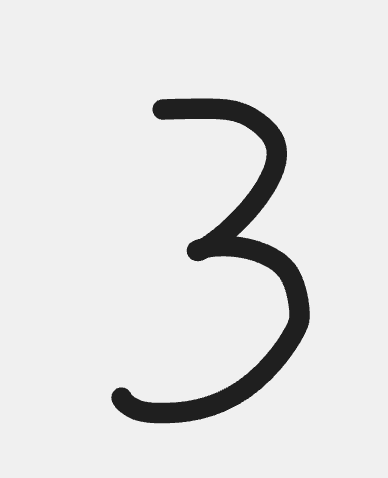

In [14]:
image7

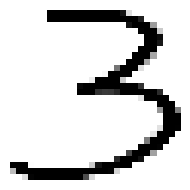

In [15]:
plot_detected_digits(image7)

In [16]:
def predict_digits(image, model):

    dgts = preprocess_and_extract_digits(image)
    if dgts.size == 0:
        return []

    predict = model.predict(dgts)
    predicted_digit = np.argmax(predict, axis=1)

    return predicted_digit

### Checking Digit Wise

In [17]:
zero= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/zero.png")
one = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/one.png")
two= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/two.png")
four= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/four.png")
five= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/five.png")
six= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/six.png")
seven= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/seven.png")
eight= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/eight.png")
nine= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Digits/nine.png")

In [18]:
list_of_images = [zero,one,two,four,five,six,seven,eight,nine]

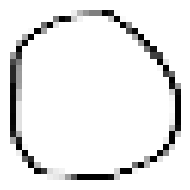

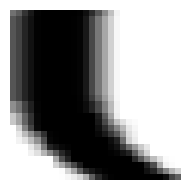

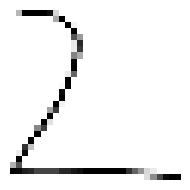

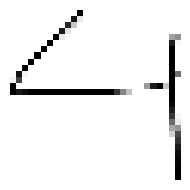

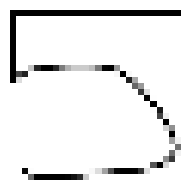

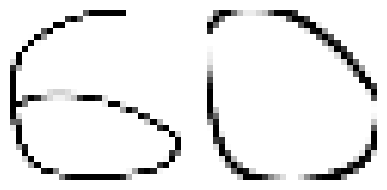

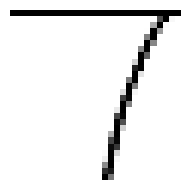

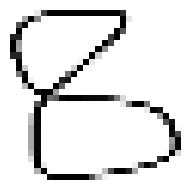

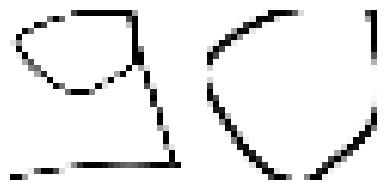

In [19]:
for i in list_of_images:
  plot_detected_digits(i)

In [20]:
cnt=0
for i in list_of_images:
  predict = predict_digits(i, model)
  print(f"{cnt} --> {predict}")
  cnt+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
0 --> [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1 --> [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2 --> [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3 --> [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4 --> [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
5 --> [8 8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6 --> [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
7 --> [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8 --> [3 8]


array([[[142, 138, 137],
        [142, 138, 137],
        [142, 138, 137],
        ...,
        [129, 127, 127],
        [129, 127, 127],
        [129, 127, 127]],

       [[142, 138, 137],
        [142, 138, 137],
        [142, 138, 137],
        ...,
        [128, 126, 126],
        [128, 126, 126],
        [128, 126, 126]],

       [[142, 138, 137],
        [142, 138, 137],
        [142, 138, 137],
        ...,
        [126, 124, 124],
        [126, 124, 124],
        [126, 124, 124]],

       ...,

       [[125, 123, 122],
        [125, 123, 122],
        [124, 122, 121],
        ...,
        [123, 123, 123],
        [123, 123, 123],
        [123, 123, 123]],

       [[126, 124, 123],
        [128, 126, 125],
        [126, 124, 123],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]],

       [[126, 124, 123],
        [128, 126, 125],
        [126, 124, 123],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]]], dtype=uint8)
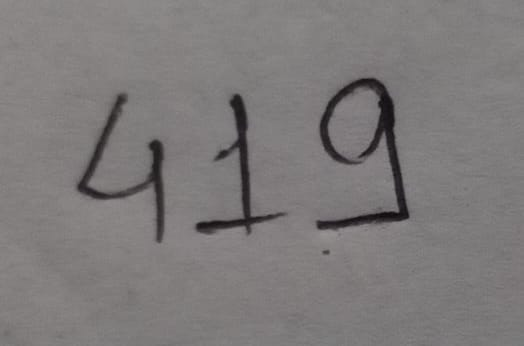

In [23]:
image1

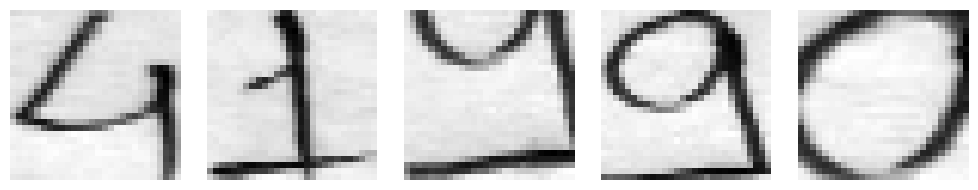

In [22]:
plot_detected_digits(image1)

In [21]:
predict_digits(image1,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


array([3, 2, 2, 3, 2])